# Movie Analysis on imdb reviews
by Surya Sekhar Dutta
task-1
Data Science Intern
Code Clause

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [8]:
#importing the dataset
df=pd.read_csv("D:\KIIT ALL INFORMATIONS\Courses\data science\movie_dataset.csv")
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [9]:
df

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,220000,Action Crime Thriller,NaN,9367,united states\u2013mexico barrier legs arms pa...,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,Carlos Gallardo Jaime de Hoyos Peter Marquardt...,"[{'name': 'Robert Rodriguez', 'gender': 0, 'de...",Robert Rodriguez
4799,4799,9000,Comedy Romance,NaN,72766,NaN,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,...,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Edward Burns Kerry Bish\u00e9 Marsha Dietlein ...,"[{'name': 'Edward Burns', 'gender': 2, 'depart...",Edward Burns
4800,4800,0,Comedy Drama Romance TV Movie,http://www.hallmarkchannel.com/signedsealeddel...,231617,date love at first sight narration investigati...,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,...,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6,Eric Mabius Kristin Booth Crystal Lowe Geoff G...,"[{'name': 'Carla Hetland', 'gender': 0, 'depar...",Scott Smith
4801,4801,0,NaN,http://shanghaicalling.com/,126186,NaN,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,...,98.0,"[{""iso_639_1"": ""en

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [12]:
df.isna().sum()

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

In [15]:
df.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

Text(0, 0.5, 'popularity')

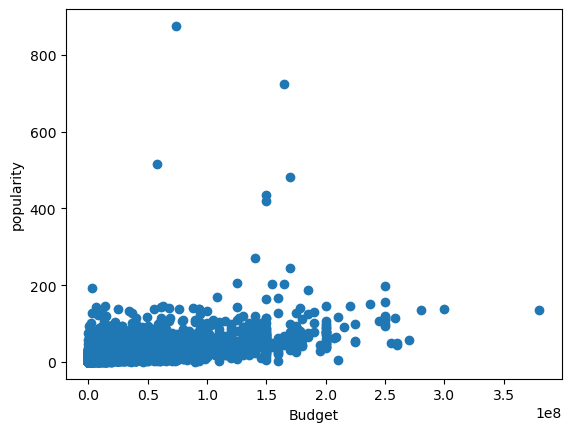

In [24]:
#create a scatter plot
fig,ax=plt.subplots()
ax.scatter(df["budget"][:5000],df["popularity"[:5000]])
plt.xlabel("Budget")
plt.ylabel("popularity")

In [25]:
df.original_title[:5000],df.release_date[:5000]

(0                                         Avatar
 1       Pirates of the Caribbean: At World's End
 2                                        Spectre
 3                          The Dark Knight Rises
 4                                    John Carter
                           ...                   
 4798                                 El Mariachi
 4799                                   Newlyweds
 4800                   Signed, Sealed, Delivered
 4801                            Shanghai Calling
 4802                           My Date with Drew
 Name: original_title, Length: 4803, dtype: object,
 0       2009-12-10
 1       2007-05-19
 2       2015-10-26
 3       2012-07-16
 4       2012-03-07
            ...    
 4798    1992-09-04
 4799    2011-12-26
 4800    2013-10-13
 4801    2012-05-03
 4802    2005-08-05
 Name: release_date, Length: 4803, dtype: object)

Text(0.5, 0, 'Budget Range in millions')

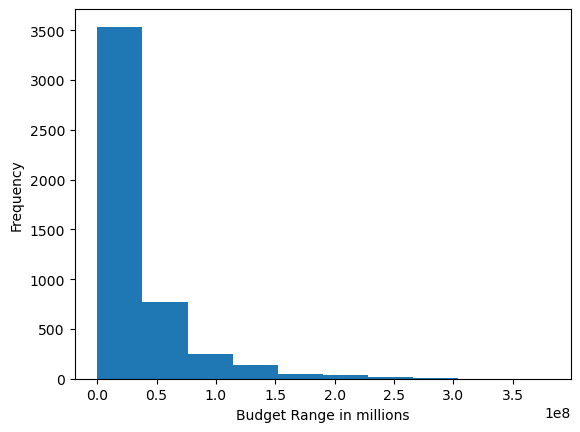

In [28]:
df.budget.plot.hist()
plt.xlabel("Budget Range in millions")

Text(0.5, 0, 'revenue Range in millions')

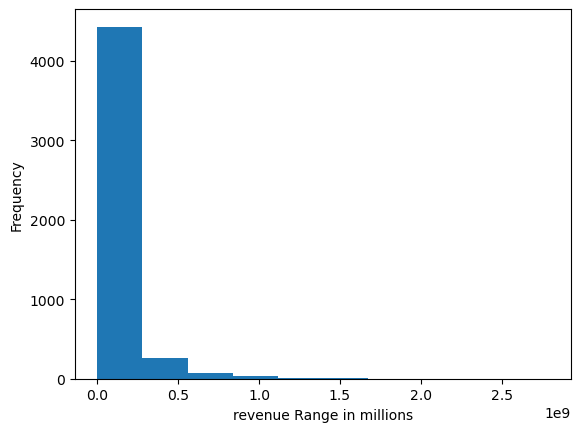

In [31]:
df.revenue.plot.hist()
plt.xlabel("revenue Range in millions")

In [30]:
df.release_date

0       2009-12-10
1       2007-05-19
2       2015-10-26
3       2012-07-16
4       2012-03-07
           ...    
4798    1992-09-04
4799    2011-12-26
4800    2013-10-13
4801    2012-05-03
4802    2005-08-05
Name: release_date, Length: 4803, dtype: object

In [37]:
df.head().T

,0,1,2,3,4
index,0,1,2,3,4
budget,237000000,300000000,245000000,250000000,260000000
genres,Action Adventure Fantasy Science Fiction,Adventure Fantasy Action,Action Adventure Crime,Action Crime Drama Thriller,Action Adventure Science Fiction
homepage,http://www.avatarmovie.com/,http://disney.go.com/disneypictures/pirates/,http://www.sonypictures.com/movies/spectre/,http://www.thedarkknightrises.com/,http://movies.disney.com/john-carter
id,19995,285,206647,49026,49529
keywords,culture clash future space war space colony so...,ocean drug abuse exotic island east india trad...,spy based on novel secret agent sequel mi6,dc comics crime fighter terrorist secret ident...,based on novel mars medallion space travel pri...
original_language,en,en,en,en,en
original_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter
overview,"In the 22nd century, a paraplegic Marine is di...","Captain Barbossa, long believed to be dead, ha...",A cryptic message from Bond’s past sends him o...,Following the death of District Attorney Harve...,"John Carter is a war-weary, former military ca..."
popularity,150.437577,139.082615,107.376788,112.31295,43.926995


# Sort DataFrame by release date

In [41]:
df.sort_values(by=["release_date"], inplace=True, ascending=True)
df.release_date.head(20)

4592    1916-09-04
4661    1925-11-05
2638    1927-01-10
4457    1929-01-30
4594    1929-02-08
3804    1930-11-15
3611    1932-12-08
4570    1933-02-02
4673    1933-02-09
4604    1934-02-22
4495    1935-09-06
4238    1936-02-05
4312    1936-10-20
2796    1937-09-03
4259    1937-12-20
4094    1938-05-24
4200    1938-08-23
3986    1939-08-15
4216    1939-10-19
3813    1939-12-15
Name: release_date, dtype: object

In [45]:
#making a copy and testing the copied dataset.
df_temp=df.copy()
df_temp

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
4592,4592,385907,Drama,NaN,3059,usa naivety intolerance mill marriage,en,Intolerance,"The story of a poor young woman, separated by ...",3.232447,...,197.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Cruel Hand of Intolerance,Intolerance,7.4,60,Lillian Gish Mae Marsh Robert Harron F.A. Turn...,"[{'name': 'Tod Browning', 'gender': 2, 'depart...",D.W. Griffith
4661,4661,245000,Drama Romance War,NaN,3060,world war i silent film,en,The Big Parade,The story of an idle rich boy who joins the US...,0.785744,...,151.0,[],Released,NaN,The Big Parade,7.0,21,John Gilbert Ren\u00e9e Ador\u00e9e Hobart Bos...,"[{'name': 'Irving Thalberg', 'gender': 2, 'dep...",King Vidor
2638,2638,92620000,Drama Science Fiction,NaN,19,man vs machine underground world inventor metr...,de,Metropolis,In a futuristic city sharply divided between t...,32.351527,...,153.0,"[{""iso_639_1"": ""xx"", ""name"": ""No Language""}]",Released,There can be no understanding between the hand...,Metropolis,8.0,657,Brigitte Helm Alfred Abel Gustav Fr\u00f6hlich...,"[{'name': 'Erich Pommer', 'gender': 2, 'depart...",Fritz Lang
4457,4457,0,Drama Thriller Romance,NaN,905,london england casino irony forbidden love los...,de,Die Büchse der Pandora,The rise and inevitable fall of an amoral but ...,1.824184,...,109.0,"[{""iso_639_1"": ""de"", ""name"": ""Deutsch""}]",Released,NaN,Pandora's Box,7.6,45,Louise Brooks Fritz Kortner Francis Lederer Ca...,"[{'name': 'G\\u00fcnther Krampf', 'gender': 2,...",G.W. Pabst
4594,4594,379000,Drama Music Romance,NaN,65203,musical singer pre-code wisecrack humor early ...,en,The Broadway Melody,"Harriet and Queenie Mahoney, a vaudeville act,...",0.968865,...,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The pulsating drama of Broadway's bared heart ...,The Broadway Melody,5.0,19,Charles King Anita Page Bessie Love Nacio Herb...,"[{'name': 'Irving Thalberg', 'gender': 2, 'dep...",Harry Beaumont
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4720,4720,8500000,Drama,http://www.foxsearchlight.com/thebirthofanation/,339408,slavery,en,The Birth of a Nation,"Nat Turner, a former slave in America, leads a...",9.452808,...,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Untold Story of Nat Turner,The Birth of a Nation,6.5,178,Nate Parker Armie Hammer Aja Naomi King Jackie...,"[{'name': 'Mary Vernieu', 'gender': 1, 'depart...",Nate Parker
3302,3302,8000000,Drama,NaN,374461,cook friendship,en,Mr. Church,A unique friendship develops when a little gir...,7.828459,...,104.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,He was the one person she could always count on.,Mr. Church,7.0,129,Eddie Murphy Britt Robertson Natascha McElhone...,"[{'name': 'Mark Isham', 'gender': 2, 'departme...",Bruce Beresford
3408,3408,0,Drama Romance,NaN,325373,small town lovers bear north pole,en,Two Lovers and a Bear,Set in a small town near the North Pole where ...,3.139294,...,96.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Two Lovers and a Bear,6.8,27,Dane DeHaan Tatiana Maslany Gordon Pinsent Joh...,"[{'name': 'Richard Comeau', 'gender': 2, 'depa...",Kim Nguyen
4255,4255,0,Comedy Family Drama,http://www.growingupsmithmovie.com,426469,NaN,en,Growing Up Smith,"In 1979, an Indian family moves to America wit...",0.710870,...,102.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,It’s better to stand out than to fit in.,Growing Up Smith,7.4,7,Roni Akurati Brighton Sharbino Jason Lee Anjul...,"[{'name': 'Frank Lotito', 'gender': 0, 'depart...",Frank Lotito


In [49]:
df_temp.head(4803).T

,4592,4661,2638,4457,4594,3804,3611,4570,4673,4604,...,3013,357,2273,4036,3249,4720,3302,3408,4255,4553
index,4592,4661,2638,4457,4594,3804,3611,4570,4673,4604,...,3013,357,2273,4036,3249,4720,3302,3408,4255,4553
budget,385907,245000,92620000,0,379000,3950000,4,439000,200000,325000,...,65000000,100000000,20000000,35000000,0,8500000,8000000,0,0,0
genres,Drama,Drama Romance War,Drama Science Fiction,Drama Thriller Romance,Drama Music Romance,Action Drama History,Drama Romance War,Music Comedy Romance,Comedy,Comedy Romance,...,Adventure Family Fantasy,Drama,Drama,Horror,Adventure,Drama,Drama,Drama Romance,Comedy Family Drama,NaN
homepage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,http://movies.disney.com/petes-dragon-2016,http://www.benhurmovie.com/,NaN,NaN,http://www.focusfeatures.com/kicks,http://www.foxsearchlight.com/thebirthofanation/,NaN,NaN,http://www.growingupsmithmovie.com,NaN
id,3059,3060,19,905,65203,22301,22649,3062,43595,3078,...,294272,271969,184341,332285,385736,339408,374461,325373,426469,380097
keywords,usa naivety intolerance mill marriage,world war i silent film,man vs machine underground world inventor metr...,london england casino irony forbidden love los...,musical singer pre-code wisecrack humor early ...,world war i zeppelin royal air force royal fly...,italy nurse love letter officer priest,philadelphia musical stage show director broke...,singer night club owner,miami reference to the big bad wolf reporter,...,feral child remake dragon orphan 1980s,betrayal vengeance,NaN,drug abuse experiment television conspiracy al...,blow job cigarette smoking illegal drugs smoki...,slavery,cook friendship,small town lovers bear north pole,NaN,NaN
original_language,en,en,de,de,en,en,en,en,en,en,...,en,en,en,en,en,en,en,en,en,en
original_title,Intolerance,The Big Parade,Metropolis,Die Büchse der Pandora,The Broadway Melody,Hell's Angels,A Farewell to Arms,42nd Street,She Done Him Wrong,It Happened One Night,...,Pete's Dragon,Ben-Hur,Hands of Stone,Antibirth,Kicks,The Birth of a Nation,Mr. Church,Two Lovers and a Bear,Growing Up Smith,America Is Still the Place
overview,"The story of a poor young woman, separated by ...",The story of an idle rich boy who joins the US...,In a futuristic city sharply divided between t...,The rise and inevitable fall of an amoral but ...,"Harriet and Queenie Mahoney, a vaudeville act,...",Two brothers attending Oxford enlist with the ...,British nurse Catherine Barkley (Helen Hayes) ...,A producer puts on what may be his last Broadw...,New York singer and nightclub owner Lady Lou h...,Ellie Andrews has just tied the knot with soci...,...,Pete is a mysterious 10-year-old with no famil...,A falsely accused nobleman survives years of s...,The legendary Roberto Duran and his equally le...,In a desolate community full of drug-addled Ma...,When his hard-earned kicks get snatched by a l...,"Nat Turner, a former slave in America, leads a...",A unique friendship develops when a little gir...,Set in a small town near the North Pole where ...,"In 1979, an Indian family moves to America wit...",1971 post civil rights San Francisco seemed li...
popularity,3.232447,0.785744,32.351527,1.824184,0.968865,8.484123,1.199451,1.933366,0.622752,11.871424,...,31.974359,29.608322,7.444189,3.674294,3.467923,9.452808,7.828459,3.139294,0.71087,0.0


In [52]:
df_temp.production_countries.value_counts()

[{"iso_3166_1": "US", "name": "United States of America"}]                                                                                                                                                                                                                                                2977
[{"iso_3166_1": "GB", "name": "United Kingdom"}, {"iso_3166_1": "US", "name": "United States of America"}]                                                                                                                                                                                                 181
[]                                                                                                                                                                                                                                                                                                         174
[{"iso_3166_1": "GB", "name": "United Kingdom"}]                                           

In [61]:
df_temp.release_date.value_counts().head(20)

2006-01-01    10
2002-01-01     8
2014-12-25     7
2004-09-03     7
2013-07-18     7
1999-10-22     7
2003-01-01     6
2007-01-01     6
2011-09-16     6
2011-09-30     6
2005-01-01     6
2005-09-16     6
2015-10-16     6
2009-09-11     5
2000-09-08     5
2009-01-01     5
2005-05-13     5
2015-10-02     5
2008-01-01     5
1998-12-25     5
Name: release_date, dtype: int64

# Machine learning Modelling

In [137]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_jobs=-1,random_state=42)
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)
# Fit the model
model.fit(df_temp.drop("revenue", axis=1), df_temp["revenue"])

RandomForestRegressor(n_jobs=-1, random_state=42)

In [70]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 4592 to 4553
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages  

In [75]:
df_temp["director"].dtype

dtype('O')

In [76]:
df_temp.isna().sum()

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

In [77]:
df_temp.head().T

,4592,4661,2638,4457,4594
index,4592,4661,2638,4457,4594
budget,385907,245000,92620000,0,379000
genres,Drama,Drama Romance War,Drama Science Fiction,Drama Thriller Romance,Drama Music Romance
homepage,NaN,NaN,NaN,NaN,NaN
id,3059,3060,19,905,65203
keywords,usa naivety intolerance mill marriage,world war i silent film,man vs machine underground world inventor metr...,london england casino irony forbidden love los...,musical singer pre-code wisecrack humor early ...
original_language,en,en,de,de,en
original_title,Intolerance,The Big Parade,Metropolis,Die Büchse der Pandora,The Broadway Melody
overview,"The story of a poor young woman, separated by ...",The story of an idle rich boy who joins the US...,In a futuristic city sharply divided between t...,The rise and inevitable fall of an amoral but ...,"Harriet and Queenie Mahoney, a vaudeville act,..."
popularity,3.232447,0.785744,32.351527,1.824184,0.968865


In [79]:
pd.api.types.is_string_dtype(df_temp["cast"])

True

In [81]:
for label,content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

genres
homepage
keywords
original_language
original_title
overview
production_companies
production_countries
release_date
spoken_languages
status
tagline
title
cast
crew
director


In [83]:
for label,content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label]=content.astype("category").cat.as_ordered()

In [84]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 4592 to 4553
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   index                 4803 non-null   int64   
 1   budget                4803 non-null   int64   
 2   genres                4775 non-null   category
 3   homepage              1712 non-null   category
 4   id                    4803 non-null   int64   
 5   keywords              4391 non-null   category
 6   original_language     4803 non-null   category
 7   original_title        4803 non-null   category
 8   overview              4800 non-null   category
 9   popularity            4803 non-null   float64 
 10  production_companies  4803 non-null   category
 11  production_countries  4803 non-null   category
 12  release_date          4802 non-null   category
 13  revenue               4803 non-null   int64   
 14  runtime               4801 non-null   float64 
 15  s

In [86]:
df_temp.status.cat.categories

Index(['Post Production', 'Released', 'Rumored'], dtype='object')

In [87]:
df_temp.spoken_languages.cat.categories

Index(['[]',
       '[{"iso_639_1": "af", "name": "Afrikaans"}, {"iso_639_1": "en", "name": "English"}, {"iso_639_1": "zu", "name": "isiZulu"}]',
       '[{"iso_639_1": "af", "name": "Afrikaans"}, {"iso_639_1": "en", "name": "English"}]',
       '[{"iso_639_1": "af", "name": "Afrikaans"}, {"iso_639_1": "ny", "name": ""}, {"iso_639_1": "st", "name": ""}, {"iso_639_1": "xh", "name": ""}, {"iso_639_1": "zu", "name": "isiZulu"}, {"iso_639_1": "en", "name": "English"}]',
       '[{"iso_639_1": "af", "name": "Afrikaans"}, {"iso_639_1": "xh", "name": ""}, {"iso_639_1": "zu", "name": "isiZulu"}]',
       '[{"iso_639_1": "ar", "name": "\u0627\u0644\u0639\u0631\u0628\u064a\u0629"}, {"iso_639_1": "de", "name": "Deutsch"}, {"iso_639_1": "el", "name": "\u03b5\u03bb\u03bb\u03b7\u03bd\u03b9\u03ba\u03ac"}, {"iso_639_1": "en", "name": "English"}, {"iso_639_1": "fr", "name": "Fran\u00e7ais"}, {"iso_639_1": "he", "name": "\u05e2\u05b4\u05d1\u05b0\u05e8\u05b4\u05d9\u05ea"}, {"iso_639_1": "it", "name": "It

In [90]:
df_temp.genres.cat.codes

4592    607
4661    741
2638    744
4457    765
4594    718
       ... 
4720    607
3302    607
3408    730
4255    487
4553     -1
Length: 4803, dtype: int16

In [92]:
# Check missing data
df_temp.isnull().sum()/len(df_temp)

index                   0.000000
budget                  0.000000
genres                  0.005830
homepage                0.643556
id                      0.000000
keywords                0.085780
original_language       0.000000
original_title          0.000000
overview                0.000625
popularity              0.000000
production_companies    0.000000
production_countries    0.000000
release_date            0.000208
revenue                 0.000000
runtime                 0.000416
spoken_languages        0.000000
status                  0.000000
tagline                 0.175724
title                   0.000000
vote_average            0.000000
vote_count              0.000000
cast                    0.008953
crew                    0.000000
director                0.006246
dtype: float64

In [94]:
# Export current tmp dataframe
df.temp.to_csv("D:\KIIT ALL INFORMATIONS\Courses\data science\movie_dataset.csv",index=False)

In [95]:
df_temp=pd.read_csv("D:\KIIT ALL INFORMATIONS\Courses\data science\movie_dataset.csv",low_memory=False)
df_temp.head().T

,0,1,2,3,4
index,4592,4661,2638,4457,4594
budget,385907,245000,92620000,0,379000
genres,Drama,Drama Romance War,Drama Science Fiction,Drama Thriller Romance,Drama Music Romance
homepage,NaN,NaN,NaN,NaN,NaN
id,3059,3060,19,905,65203
keywords,usa naivety intolerance mill marriage,world war i silent film,man vs machine underground world inventor metr...,london england casino irony forbidden love los...,musical singer pre-code wisecrack humor early ...
original_language,en,en,de,de,en
original_title,Intolerance,The Big Parade,Metropolis,Die Büchse der Pandora,The Broadway Melody
overview,"The story of a poor young woman, separated by ...",The story of an idle rich boy who joins the US...,In a futuristic city sharply divided between t...,The rise and inevitable fall of an amoral but ...,"Harriet and Queenie Mahoney, a vaudeville act,..."
popularity,3.232447,0.785744,32.351527,1.824184,0.968865


# Finding the missing values

In [96]:
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

index
budget
id
popularity
revenue
runtime
vote_average
vote_count


In [100]:
df_temp.revenue

0        8394751
1       22000000
2         650422
3              0
4        4358000
          ...   
4798    15861566
4799           0
4800           0
4801           0
4802           0
Name: revenue, Length: 4803, dtype: int64

In [101]:
# Check for which numeric columns have null values
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

runtime


In [102]:
#fill the rows with the median
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #add binary columns which tells us the data was missing or not
            df_temp[label+"is missing"]=pd.isnull(content)
            #flll the missing values with the median values
            df_temp[label]=content.fillna(content.median())

In [104]:
# Check if there's any null numeric values if any after median values are set (which are none)
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [111]:
# Check to see how many examples were missing
df_temp["homepage"].isna().value_counts()


True     3091
False    1712
Name: homepage, dtype: int64

# Filling and turning categorical variables into numbers

In [112]:
# Check for which are not numeric columns have null values
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

genres
homepage
keywords
overview
release_date
tagline
cast
director


In [113]:
# Turn categorical variables into numbers and fill missing
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        df_temp[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df_temp[label] = pd.Categorical(content).codes+1

In [118]:
pd.Categorical(df_temp["homepage"]).codes+1

array([  1,   1,   1, ...,   1, 756,   1], dtype=int16)

In [119]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   index                            4803 non-null   int64  
 1   budget                           4803 non-null   int64  
 2   genres                           4803 non-null   int16  
 3   homepage                         4803 non-null   int16  
 4   id                               4803 non-null   int64  
 5   keywords                         4803 non-null   int16  
 6   original_language                4803 non-null   int8   
 7   original_title                   4803 non-null   int16  
 8   overview                         4803 non-null   int16  
 9   popularity                       4803 non-null   float64
 10  production_companies             4803 non-null   int16  
 11  production_countries             4803 non-null   int16  
 12  release_date        

In [124]:
df_temp.head(10).T

,0,1,2,3,4,5,6,7,8,9
index,4592,4661,2638,4457,4594,3804,3611,4570,4673,4604
budget,385907,245000,92620000,0,379000,3950000,4,439000,200000,325000
genres,608,742,745,766,719,146,742,947,416,523
homepage,0,0,0,0,0,0,0,0,0,0
id,3059,3060,19,905,65203,22301,22649,3062,43595,3078
keywords,3972,4191,2324,2140,2570,4192,1984,2875,3500,2418
original_language,8,8,6,6,8,8,8,8,8,8
original_title,1823,3470,2284,996,3518,1598,94,62,3046,1839
overview,3970,3977,2470,3926,2269,4246,1629,582,3095,1961
popularity,3.232447,0.785744,32.351527,1.824184,0.968865,8.484123,1.199451,1.933366,0.622752,11.871424


In [125]:
df_temp.isna().sum()

index                              0
budget                             0
genres                             0
homepage                           0
id                                 0
keywords                           0
original_language                  0
original_title                     0
overview                           0
popularity                         0
production_companies               0
production_countries               0
release_date                       0
revenue                            0
runtime                            0
spoken_languages                   0
status                             0
tagline                            0
title                              0
vote_average                       0
vote_count                         0
cast                               0
crew                               0
director                           0
runtimeis missing                  0
genres_is_missing                  0
homepage_is_missing                0
k

In [126]:
df_temp.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,production_companies_is_missing,production_countries_is_missing,release_date_is_missing,spoken_languages_is_missing,status_is_missing,tagline_is_missing,title_is_missing,cast_is_missing,crew_is_missing,director_is_missing
0,4592,385907,608,0,3059,3972,8,1823,3970,3.232447,...,False,False,False,False,False,False,False,False,False,False
1,4661,245000,742,0,3060,4191,8,3470,3977,0.785744,...,False,False,False,False,False,True,False,False,False,False
2,2638,92620000,745,0,19,2324,6,2284,2470,32.351527,...,False,False,False,False,False,False,False,False,False,False
3,4457,0,766,0,905,2140,6,996,3926,1.824184,...,False,False,False,False,False,True,False,False,False,False
4,4594,379000,719,0,65203,2570,8,3518,2269,0.968865,...,False,False,False,False,False,False,False,False,False,False


In [131]:
len(df_temp)

4803

In [133]:
%%time
# Instantiate model
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

# Fit the model
model.fit(df_temp.drop("revenue", axis=1), df_temp["revenue"])

Wall time: 1.22 s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [135]:
# Score the model
model.score(df_temp.drop("revenue", axis=1), df_temp["revenue"])

0.9691643349159301

In [138]:
df_temp.vote_count.value_counts()

0       62
1       53
2       46
4       43
3       41
        ..
2704     1
3525     1
532      1
3041     1
7458     1
Name: vote_count, Length: 1609, dtype: int64

# splitting data into train and test dataset

In [152]:
# Split data into X & y
df_val = df_temp[df_temp.status == "released"]
df_train = df_temp[df_temp.status != "not released"]
len(df_val), len(df_train)

(0, 4803)

In [153]:
X_train, y_train = df_train.drop("revenue", axis=1), df_train.revenue
X_valid, y_valid = df_val.drop("revenue", axis=1), df_val.revenue

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((4803, 40), (4803,), (0, 40), (0,))

In [154]:
y_train

0        8394751
1       22000000
2         650422
3              0
4        4358000
          ...   
4798    15861566
4799           0
4800           0
4801           0
4802           0
Name: revenue, Length: 4803, dtype: int64

In [156]:
X_train

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,production_companies_is_missing,production_countries_is_missing,release_date_is_missing,spoken_languages_is_missing,status_is_missing,tagline_is_missing,title_is_missing,cast_is_missing,crew_is_missing,director_is_missing
0,4592,385907,608,0,3059,3972,8,1823,3970,3.232447,...,False,False,False,False,False,False,False,False,False,False
1,4661,245000,742,0,3060,4191,8,3470,3977,0.785744,...,False,False,False,False,False,True,False,False,False,False
2,2638,92620000,745,0,19,2324,6,2284,2470,32.351527,...,False,False,False,False,False,False,False,False,False,False
3,4457,0,766,0,905,2140,6,996,3926,1.824184,...,False,False,False,False,False,True,False,False,False,False
4,4594,379000,719,0,65203,2570,8,3518,2269,0.968865,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4720,8500000,608,713,339408,3538,8,3476,3069,9.452808,...,False,False,False,False,False,False,False,False,False,False
4799,3302,8000000,608,0,374461,962,8,2369,806,7.828459,...,False,False,False,False,False,False,False,False,False,False
4800,3408,0,731,0,325373,3550,8,4437,3447,3.139294,...,False,False,False,False,False,True,False,False,False,False
4801,4255,0,488,755,426469,0,8,1511,2393,0.710870,...,False,False,False,False,False,False,False,False,False,False


In [157]:
X_valid

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,production_companies_is_missing,production_countries_is_missing,release_date_is_missing,spoken_languages_is_missing,status_is_missing,tagline_is_missing,title_is_missing,cast_is_missing,crew_is_missing,director_is_missing


In [158]:
y_valid

Series([], Name: revenue, dtype: int64)

# Building a evaluation function

In [159]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

mean_squared_log_error (MSLE): It is a metric commonly used for evaluating regression models. It calculates the mean squared logarithmic error between the predicted and true values. MSLE penalizes underestimation and overestimation of the target variable, and it is particularly useful when the target variable has exponential or skewed distribution.

mean_absolute_error (MAE): It is a metric used for evaluating regression models. It calculates the mean absolute difference between the predicted and true values. MAE represents the average magnitude of the errors without considering their direction, making it robust to outliers.

r2_score: Also known as the coefficient of determination, it is a metric used for evaluating regression models. It measures the proportion of the variance in the target variable that can be explained by the predictors. R-squared ranges from 0 to 1, with higher values indicating a better fit of the model.



In [197]:
     """
    Caculates root mean squared log error between predictions and
    true labels.
    """
def rmsle(y_test,y_pred):    
    return np.sqrt(mean_squre_log_error(y_test,y_pred))
#Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds)}
    return scores
    

# Testing our model on a subset (to tune the hyperparameters)

In [180]:
model = RandomForestRegressor(n_jobs=-1,random_state=42,max_samples=4803)

Wall time: 0 ns


RandomForestRegressor(max_samples=4803, n_jobs=-1, random_state=42)

In [184]:
%%time
model.fit(X_train,y_train)

Wall time: 917 ms


RandomForestRegressor(max_samples=4803, n_jobs=-1, random_state=42)

In [185]:
(X_train.shape[0]*100/10000)

48.03

In [199]:
show_scores(model)

ValueError: Found array with 0 sample(s) (shape=(0, 40)) while a minimum of 1 is required.

In [200]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [4803]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Wall time: 309 ms


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 385, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 111, in _get_n_samples_bootstrap
    raise ValueError(msg.format(n_samples, max

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [4803],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [201]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 10,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_samples': 4803,
 'max_features': 1,
 'max_depth': None}

In [202]:
show_scores(rs_model)

ValueError: Found array with 0 sample(s) (shape=(0, 40)) while a minimum of 1 is required.

# Train a model with the best hyperparamters
Note: These were found after 100 iterations of RandomizedSearchCV.

In [203]:
%%time

# Most ideal hyperparamters
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42) # random state so our results are reproducible

# Fit the ideal model
ideal_model.fit(X_train, y_train)

Wall time: 283 ms


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [204]:
# Scores for ideal_model (trained on all the data)
show_scores(ideal_model)

ValueError: Found array with 0 sample(s) (shape=(0, 40)) while a minimum of 1 is required.

# Make predictions on test data

In [205]:
df_test=pd.read_csv("D:\KIIT ALL INFORMATIONS\Courses\data science\movie_dataset.csv",low_memory=False)
df_test.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,4592,385907,Drama,NaN,3059,usa naivety intolerance mill marriage,en,Intolerance,"The story of a poor young woman, separated by ...",3.232447,...,197.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Cruel Hand of Intolerance,Intolerance,7.4,60,Lillian Gish Mae Marsh Robert Harron F.A. Turn...,"[{'name': 'Tod Browning', 'gender': 2, 'depart...",D.W. Griffith
1,4661,245000,Drama Romance War,NaN,3060,world war i silent film,en,The Big Parade,The story of an idle rich boy who joins the US...,0.785744,...,151.0,[],Released,NaN,The Big Parade,7.0,21,John Gilbert Ren\u00e9e Ador\u00e9e Hobart Bos...,"[{'name': 'Irving Thalberg', 'gender': 2, 'dep...",King Vidor
2,2638,92620000,Drama Science Fiction,NaN,19,man vs machine underground world inventor metr...,de,Metropolis,In a futuristic city sharply divided between t...,32.351527,...,153.0,"[{""iso_639_1"": ""xx"", ""name"": ""No Language""}]",Released,There can be no understanding between the hand...,Metropolis,8.0,657,Brigitte Helm Alfred Abel Gustav Fr\u00f6hlich...,"[{'name': 'Erich Pommer', 'gender': 2, 'depart...",Fritz Lang
3,4457,0,Drama Thriller Romance,NaN,905,london england casino irony forbidden love los...,de,Die Büchse der Pandora,The rise and inevitable fall of an amoral but ...,1.824184,...,109.0,"[{""iso_639_1"": ""de"", ""name"": ""Deutsch""}]",Released,NaN,Pandora's Box,7.6,45,Louise Brooks Fritz Kortner Francis Lederer Ca...,"[{'name': 'G\\u00fcnther Krampf', 'gender': 2,...",G.W. Pabst
4,4594,379000,Drama Music Romance,NaN,65203,musical singer pre-code wisecrack humor early ...,en,The Broadway Melody,"Harriet and Queenie Mahoney, a vaudeville act,...",0.968865,...,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The pulsating drama of Broadway's bared heart ...,The Broadway Melody,5.0,19,Charles King Anita Page Bessie Love Nacio Herb...,"[{'name': 'Irving Thalberg', 'gender': 2, 'dep...",Harry Beaumont


In [206]:
# Make predictions on the test dataset
test_preds = ideal_model.predict(df_test)

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- revenue
Feature names seen at fit time, yet now missing:
- cast_is_missing
- crew_is_missing
- director_is_missing
- genres_is_missing
- homepage_is_missing
- ...

  warnings.warn(message, FutureWarning)


ValueError: could not convert string to float: 'Drama'

Preprocessing the data (getting the test dataset in the same format as our training dataset)

In [213]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
    df["release_date"] = df.release_date.dt.year
    df["release_date"] = df.release_date.dt.month
    df["release_date"] = df.release_date.dt.day
    df["release_date"] = df.release_date.dt.dayofweek
    df["release_date"] = df.release_date.dt.dayofyear
    
    df.drop("release_date", axis=1, inplace=True)
    
    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing or not
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())
                   # Filled categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add +1 to the category code because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1
    
    return df

In [215]:
# Process the test data 
#df_test = preprocess_data(df_test)
df_test.release_date.head(5)

0    1916-09-04
1    1925-11-05
2    1927-01-10
3    1929-01-30
4    1929-02-08
Name: release_date, dtype: object

In [216]:
X_train.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,production_companies_is_missing,production_countries_is_missing,release_date_is_missing,spoken_languages_is_missing,status_is_missing,tagline_is_missing,title_is_missing,cast_is_missing,crew_is_missing,director_is_missing
0,4592,385907,608,0,3059,3972,8,1823,3970,3.232447,...,False,False,False,False,False,False,False,False,False,False
1,4661,245000,742,0,3060,4191,8,3470,3977,0.785744,...,False,False,False,False,False,True,False,False,False,False
2,2638,92620000,745,0,19,2324,6,2284,2470,32.351527,...,False,False,False,False,False,False,False,False,False,False
3,4457,0,766,0,905,2140,6,996,3926,1.824184,...,False,False,False,False,False,True,False,False,False,False
4,4594,379000,719,0,65203,2570,8,3518,2269,0.968865,...,False,False,False,False,False,False,False,False,False,False


In [217]:
# We can find how the columns differ using sets
set(X_train.columns) - set(df_test.columns)

{'cast_is_missing',
 'crew_is_missing',
 'director_is_missing',
 'genres_is_missing',
 'homepage_is_missing',
 'keywords_is_missing',
 'original_language_is_missing',
 'original_title_is_missing',
 'overview_is_missing',
 'production_companies_is_missing',
 'production_countries_is_missing',
 'release_date_is_missing',
 'runtimeis missing',
 'spoken_languages_is_missing',
 'status_is_missing',
 'tagline_is_missing',
 'title_is_missing'}

In [218]:
# Manually adjust df_test to have auctioneerID_is_missing column
df_test["auctioneerID_is_missing"] = False
df_test.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,auctioneerID_is_missing
0,4592,385907,Drama,NaN,3059,usa naivety intolerance mill marriage,en,Intolerance,"The story of a poor young woman, separated by ...",3.232447,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Cruel Hand of Intolerance,Intolerance,7.4,60,Lillian Gish Mae Marsh Robert Harron F.A. Turn...,"[{'name': 'Tod Browning', 'gender': 2, 'depart...",D.W. Griffith,False
1,4661,245000,Drama Romance War,NaN,3060,world war i silent film,en,The Big Parade,The story of an idle rich boy who joins the US...,0.785744,...,[],Released,NaN,The Big Parade,7.0,21,John Gilbert Ren\u00e9e Ador\u00e9e Hobart Bos...,"[{'name': 'Irving Thalberg', 'gender': 2, 'dep...",King Vidor,False
2,2638,92620000,Drama Science Fiction,NaN,19,man vs machine underground world inventor metr...,de,Metropolis,In a futuristic city sharply divided between t...,32.351527,...,"[{""iso_639_1"": ""xx"", ""name"": ""No Language""}]",Released,There can be no understanding between the hand...,Metropolis,8.0,657,Brigitte Helm Alfred Abel Gustav Fr\u00f6hlich...,"[{'name': 'Erich Pommer', 'gender': 2, 'depart...",Fritz Lang,False
3,4457,0,Drama Thriller Romance,NaN,905,london england casino irony forbidden love los...,de,Die Büchse der Pandora,The rise and inevitable fall of an amoral but ...,1.824184,...,"[{""iso_639_1"": ""de"", ""name"": ""Deutsch""}]",Released,NaN,Pandora's Box,7.6,45,Louise Brooks Fritz Kortner Francis Lederer Ca...,"[{'name': 'G\\u00fcnther Krampf', 'gender': 2,...",G.W. Pabst,False
4,4594,379000,Drama Music Romance,NaN,65203,musical singer pre-code wisecrack humor early ...,en,The Broadway Melody,"Harriet and Queenie Mahoney, a vaudeville act,...",0.968865,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The pulsating drama of Broadway's bared heart ...,The Broadway Melody,5.0,19,Charles King Anita Page Bessie Love Nacio Herb...,"[{'name': 'Irving Thalberg', 'gender': 2, 'dep...",Harry Beaumont,False


In [225]:
# Preprocess the test data
# Assuming df_test is the DataFrame containing the test data

# Handle missing values
# Replace missing numeric values with the mean of the corresponding column
numeric_cols = df_test.select_dtypes(include=np.number).columns
df_test[numeric_cols] = df_test[numeric_cols].fillna(df_test[numeric_cols].mean())

# Handle categorical variables
# Perform one-hot encoding for categorical columns
categorical_cols = df_test.select_dtypes(include='object').columns
df_test_encoded = pd.get_dummies(df_test, columns=categorical_cols)

# Ensure that the test data has the same features as the training data
# Use the reindex method to align the columns
df_test_encoded = df_test_encoded.reindex(columns=X_train.columns, fill_value=0)

# Make predictions on the test data
test_preds = model.predict(df_test_encoded)

In [226]:
# Format predictions into the same format Kaggle is after
df_preds = pd.DataFrame()
df_preds["index"] = df_test["index"]
df_preds["revenue"] = test_preds
df_preds

,index,revenue
0,4592,1.570416e+07
1,4661,1.506035e+07
2,2638,1.686462e+08
3,4457,6.529541e+06
4,4594,1.267487e+07
...,...,...
4798,4720,4.935971e+07
4799,3302,3.394435e+07
4800,3408,6.082054e+06
4801,4255,5.101229e+06


In [229]:
# Export prediction data
df_preds.to_csv("D:\KIIT ALL INFORMATIONS\Courses\data science\movie_dataset.csv")

In [230]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([2.13982065e-01, 1.02235522e-01, 9.39418022e-03, 6.27507455e-03,
       1.36078957e-02, 4.08060862e-03, 1.36745595e-04, 3.79771992e-03,
       8.86008524e-03, 9.51511738e-02, 1.09610663e-02, 3.05264078e-03,
       1.45577493e-02, 1.78434047e-02, 4.06386779e-03, 2.77474007e-10,
       5.56698781e-03, 1.15953721e-02, 1.18077729e-02, 4.40632621e-01,
       6.86916815e-03, 7.80692479e-03, 6.57429784e-03, 0.00000000e+00,
       0.00000000e+00, 1.09899851e-03, 2.32903918e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.37584946e-05,
       0.00000000e+00, 1.00705962e-06, 0.00000000e+00, 1.02083405e-09])

In [232]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

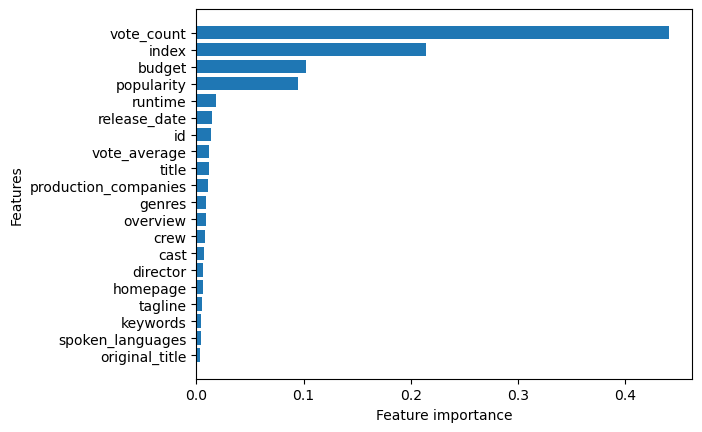

In [233]:
plot_features(X_train.columns, ideal_model.feature_importances_)

In [235]:
df["cast"].value_counts()

William Shatner Leonard Nimoy DeForest Kelley James Doohan George Takei                 6
Patrick Stewart Jonathan Frakes Brent Spiner LeVar Burton Michael Dorn                  4
Zac Efron Vanessa Hudgens Ashley Tisdale Lucas Grabeel Corbin Bleu                      3
Jennifer Lawrence Josh Hutcherson Liam Hemsworth Woody Harrelson Elizabeth Banks        3
Ewan McGregor Natalie Portman Hayden Christensen Ian McDiarmid Samuel L. Jackson        2
                                                                                       ..
Vivica A. Fox Morris Chestnut Anthony Anderson Gabrielle Union Wendy Raquel Robinson    1
Michael York Michael Biehn Diane Venora R. Lee Ermey Udo Kier                           1
Barry Pepper Andy Davoli Seth Green Vin Diesel John Malkovich                           1
Anthony Hopkins Anton Yelchin Hope Davis Mika Boorem David Morse                        1
Roni Akurati Brighton Sharbino Jason Lee Anjul Nigam Hilarie Burton                     1
Name: cast